<a href="https://colab.research.google.com/github/AshwiniKalamkar/capstone-project/blob/main/Individual_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

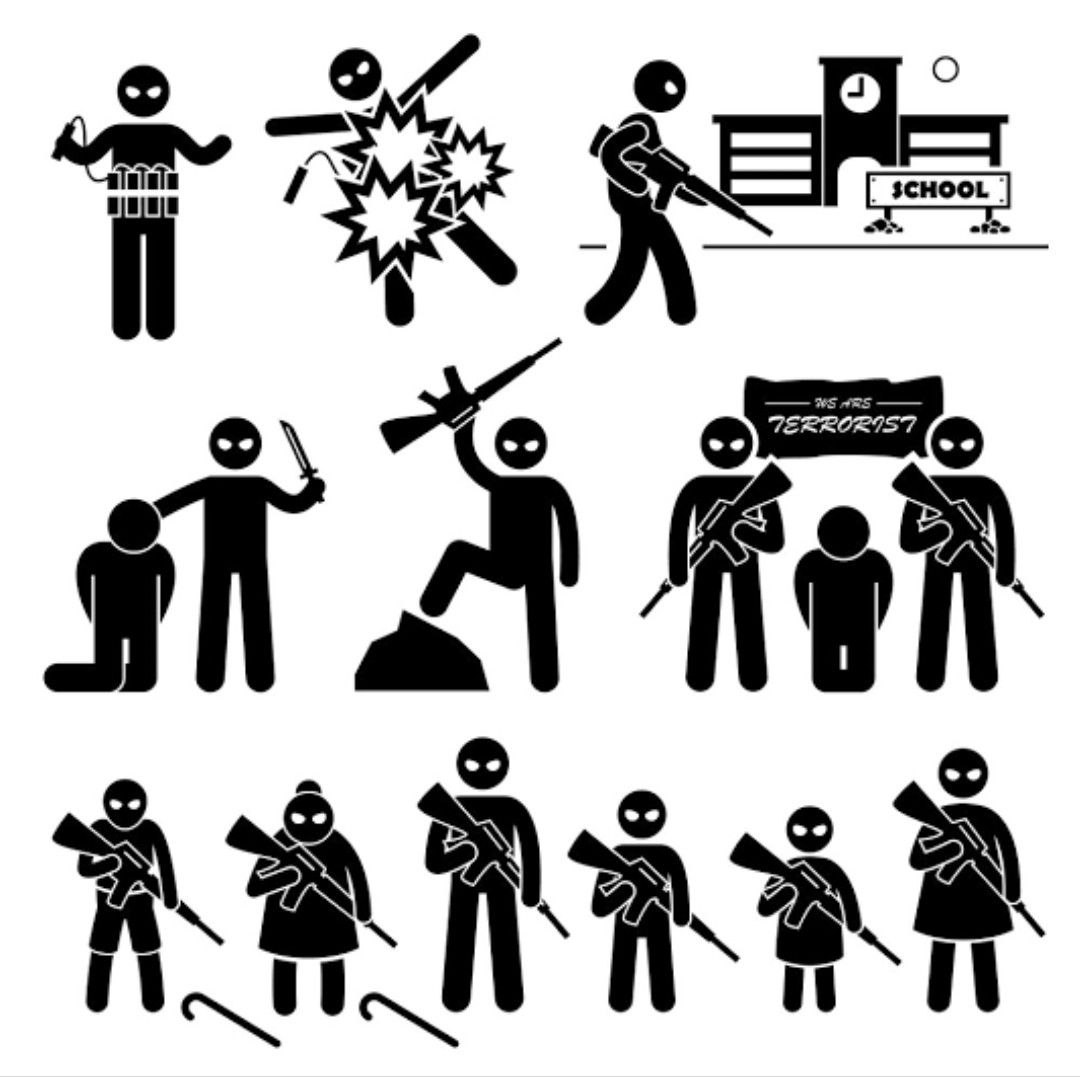

# Exploratary Data Analysis -Terrorism

Team Name :

Ashwini Kalamkar

Importing all the libraries required for analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_terrorism = pd.read_csv('/content/drive/MyDrive/Global folder/globalterrorismdb_0718dist.csv',encoding = "latin1")
df =pd.DataFrame(data_terrorism)
print("Data has been successfully imported")
df.head()



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Data has been successfully imported


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
df.shape

(181691, 135)

In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
for i in df.columns:
  print(i,end=",")

eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weapt

# **Cleaning the data**

In [ ]:
df=df[["iyear","imonth","iday","country_txt","region_txt","provstate","city","attacktype1_txt","targtype1_txt","gname","weaptype1_txt","nkill","nwound"]]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,nkill,nwound
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   iday             181691 non-null  int64  
 3   country_txt      181691 non-null  object 
 4   region_txt       181691 non-null  object 
 5   provstate        181270 non-null  object 
 6   city             181257 non-null  object 
 7   attacktype1_txt  181691 non-null  object 
 8   targtype1_txt    181691 non-null  object 
 9   gname            181691 non-null  object 
 10  weaptype1_txt    181691 non-null  object 
 11  nkill            171378 non-null  float64
 12  nwound           165380 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 18.0+ MB


In [ ]:
df.shape

(181691, 13)

In [ ]:
df.isnull().sum()

iyear                  0
imonth                 0
iday                   0
country_txt            0
region_txt             0
provstate            421
city                 434
attacktype1_txt        0
targtype1_txt          0
gname                  0
weaptype1_txt          0
nkill              10313
nwound             16311
dtype: int64

In [ ]:
df["nkill"]=df["nkill"].fillna(0)
df["nwound"]=df["nwound"].fillna(0)
df["casualty"]=df["nkill"]+df["nwound"]
df.describe()

,iyear,imonth,iday,nkill,nwound,casualty
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000,9574.000000


# *Visualizing the data*

## ***1]Year wise Attacks***

## a)no.of attacks in each year
  
###  which year is the most affected ny the highest attacks  ?

In [ ]:
years_attacks= df["iyear"].value_counts(dropna=False).sort_index().to_frame()
years_attacks.head()

,iyear
1970,651
1971,471
1972,568
1973,473
1974,581


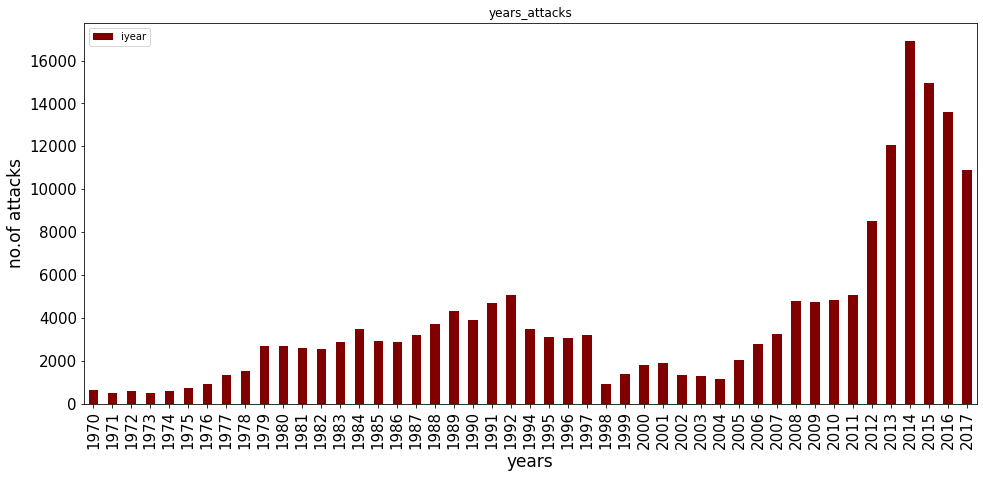

In [ ]:
years_attacks.plot(kind="bar",color="maroon",figsize=(16,7),fontsize=15)
plt.title("years_attacks")
plt.xlabel("years",fontsize=17)
plt.ylabel("no.of attacks",fontsize=17)
plt.show()




##    b)Total Casualties(nkill + nwound)in each year
###       which year is  the most casualties showing?

In [ ]:
year_casuality = df[["iyear","casualty"]].groupby("iyear").sum()
year_casuality.head()

,casualty
iyear,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


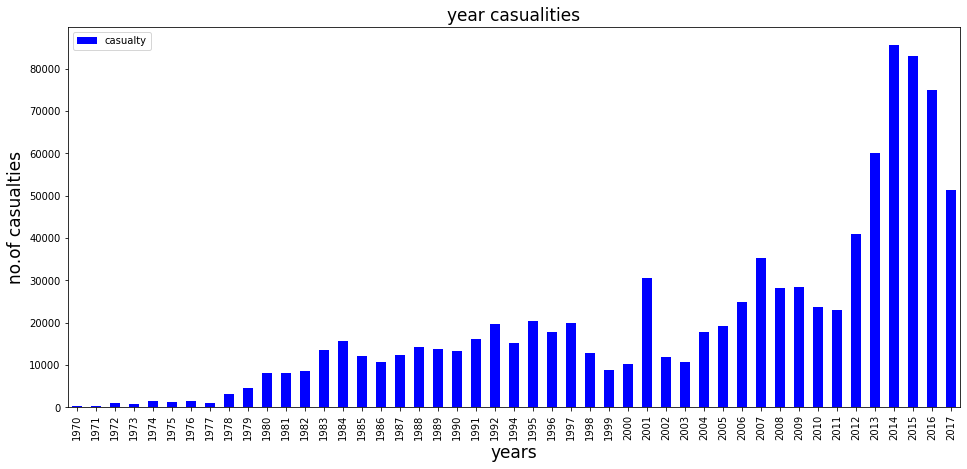

In [ ]:
year_casuality.plot(kind="bar",color="blue",figsize=(16,7))
plt.title("year casualities",fontsize=17)
plt.xlabel("years",fontsize=17)
plt.ylabel("no.of casualties",fontsize=17)
plt.show()


##         c)Total nkill in each year
      
###      which year is most kill people showing ?

In [ ]:
years_kill = df[["iyear","nkill"]].groupby("iyear").sum()
years_kill.head()

,nkill
iyear,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


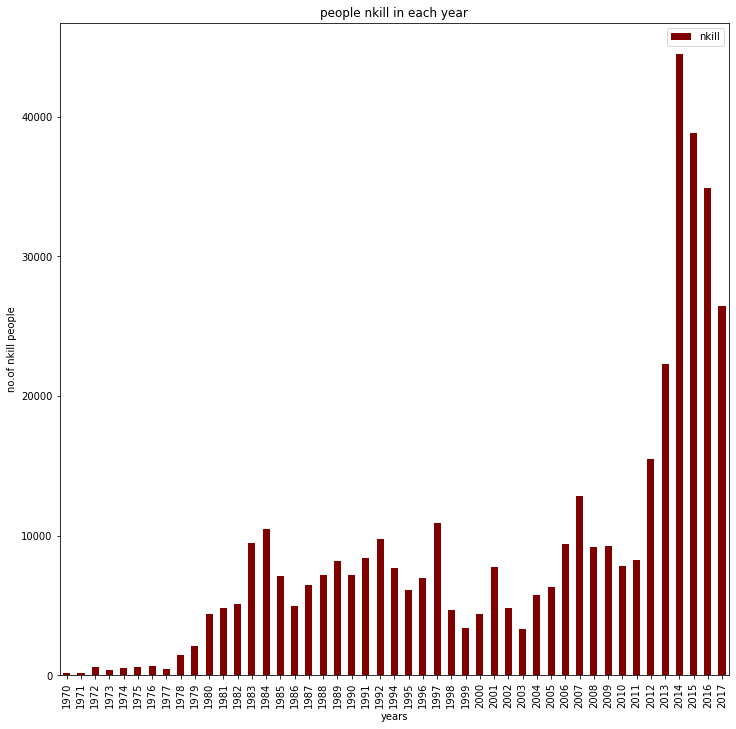

In [ ]:
years_kill.plot(kind="bar",color="maroon",figsize=(12,12))
plt.title("people nkill in each year")
plt.xlabel("years")
plt.ylabel("no.of nkill people")
plt.show()



##           d)nwound in each year 

###                which year is most wound people showing ?

In [ ]:
years_wound = df[["iyear","nwound"]].groupby("iyear").sum()
years_wound.head()

,nwound
iyear,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


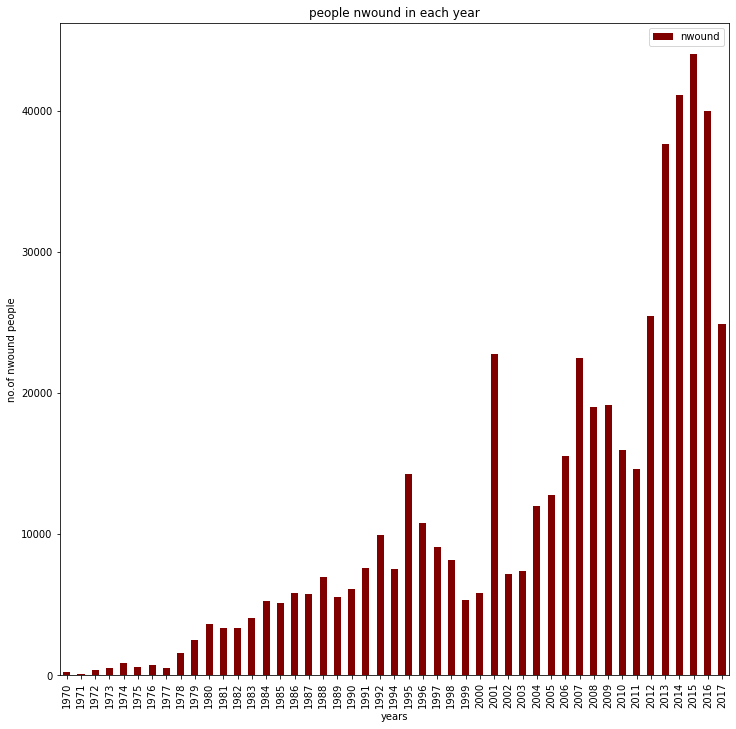

In [ ]:
years_wound.plot(kind="bar",color="maroon",figsize=(12,12))
plt.title("people nwound in each year")
plt.xlabel("years")
plt.ylabel("no.of nwound people")
plt.show()



## ***2] Regions wise Attacks***

##   a)Distribution of terrorist attacks over regions from 1970-2017





In [ ]:
regions = pd.crosstab(df.iyear,df.region_txt)
regions.head()

region_txt,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
iyear,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


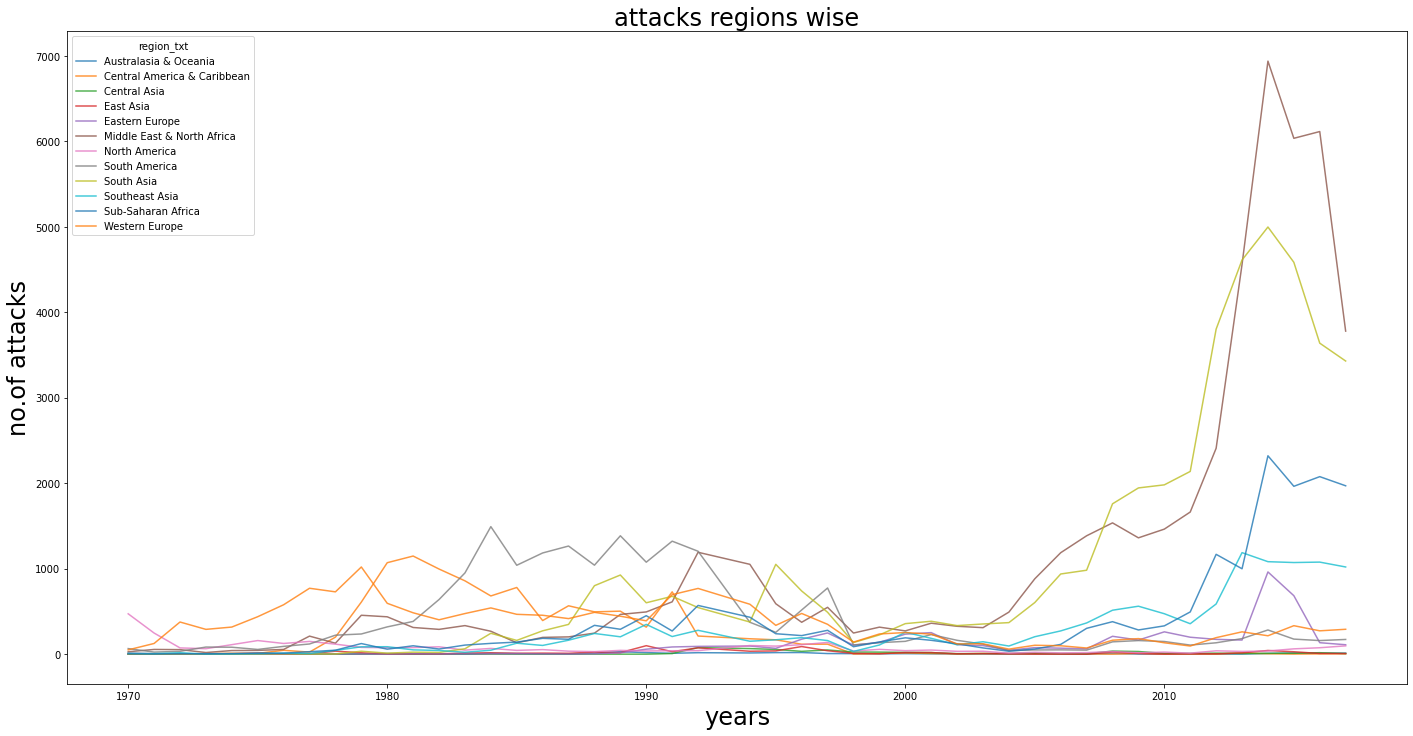

In [ ]:
regions.plot(kind="line",stacked=False,alpha=0.8,figsize=(24,12))
plt.title("attacks regions wise",fontsize=24)
plt.xlabel("years",fontsize=24)
plt.ylabel("no.of attacks",fontsize=24)

plt.show()

 -
             
##    b)Total terririst attacks in each regions.

###         which regions contain maximum number of terririst attacks ?

In [ ]:
regions_attacks=regions.transpose()
regions_attacks["Total"]=regions_attacks.sum(axis=1)
at = regions_attacks["Total"].sort_values(ascending=False)
at


region_txt
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Total, dtype: int64

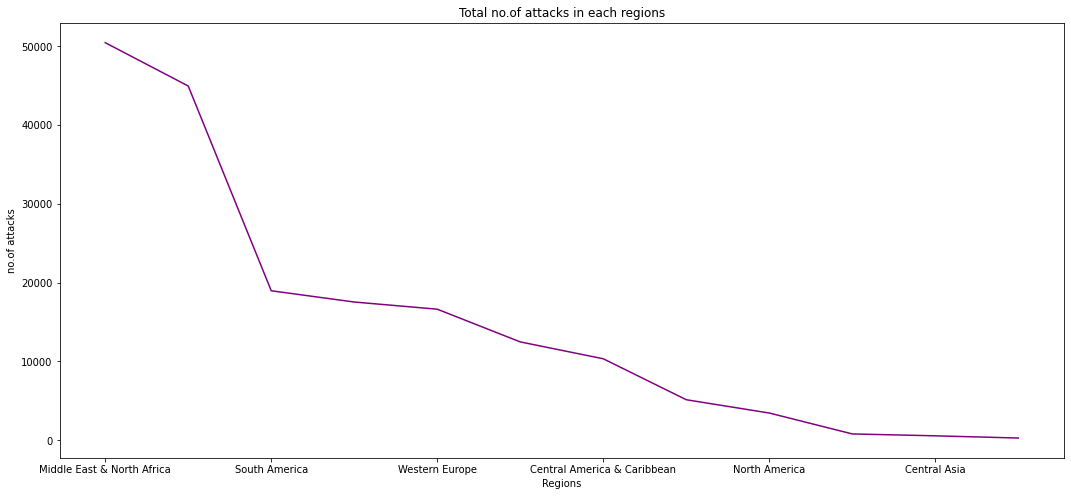

In [ ]:
at.plot(kind="line",figsize=(18,8),color=("purple"))
plt.title("Total no.of attacks in each regions")
plt.xlabel("Regions")
plt.ylabel("no.of attacks")
plt.show()




##                c)Total Casualties(nkill + nwound)in each regions

###                      which regions contain maximum number of casualty?

In [ ]:
region_casualty = df[["region_txt","casualty"]].groupby("region_txt").sum().sort_values(by="casualty",ascending=False)
region_casualty

,casualty
region_txt,
Middle East & North Africa,351950.0
South Asia,242679.0
Sub-Saharan Africa,131243.0
South America,45553.0
Southeast Asia,41896.0
Central America & Caribbean,37699.0
North America,26447.0
Western Europe,25026.0
Eastern Europe,19460.0


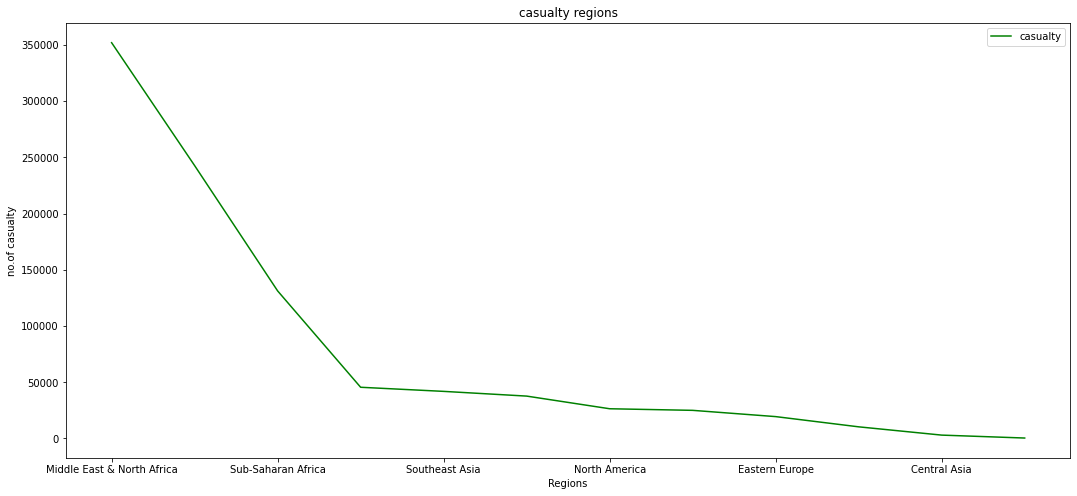

In [ ]:
region_casualty.plot(kind="line",figsize=(18,8),color=("green"))
plt.title("casualty regions")
plt.xlabel("Regions")
plt.ylabel("no.of casualty")
plt.show()






##        d)Total nkill people in each regions.

###            which regions contain maximum number of kill pepple in terririst attacks ?



In [ ]:
region_kill= df[["region_txt","nkill"]].groupby("region_txt").sum().sort_values(by="nkill",ascending=False)
region_kill

,nkill
region_txt,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


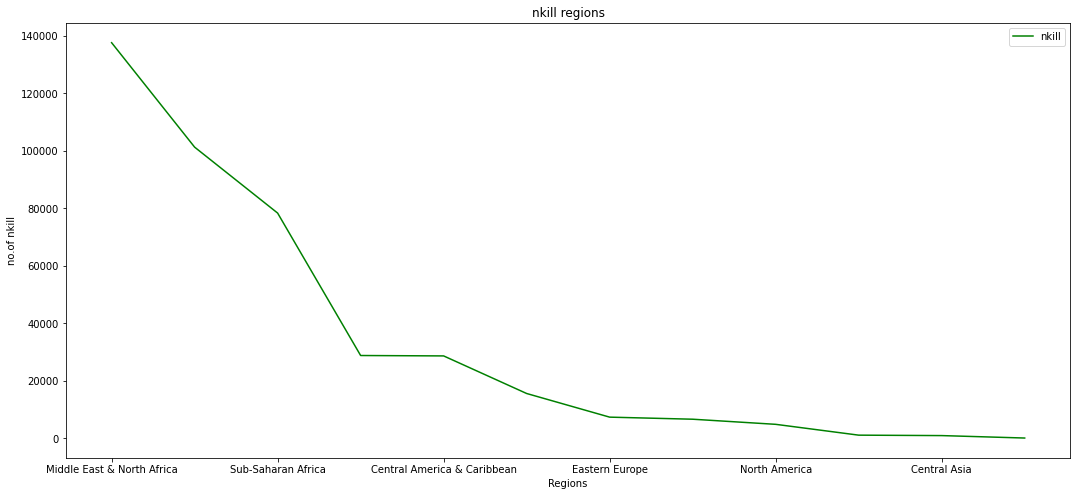

In [ ]:
region_kill.plot(kind="line",figsize=(18,8),color=("green"))
plt.title("nkill regions")
plt.xlabel("Regions")
plt.ylabel("no.of nkill")
plt.show()




##            e)Total nwound people in each regions.
                 
###                 which regions contain maximum number of wound pepple in terririst attacks ?

In [ ]:
region_wound= df[["region_txt","nwound"]].groupby("region_txt").sum().sort_values(by="nwound",ascending=False)
region_wound

,nwound
region_txt,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0
Western Europe,18332.0
South America,16704.0
Eastern Europe,12045.0
East Asia,9213.0


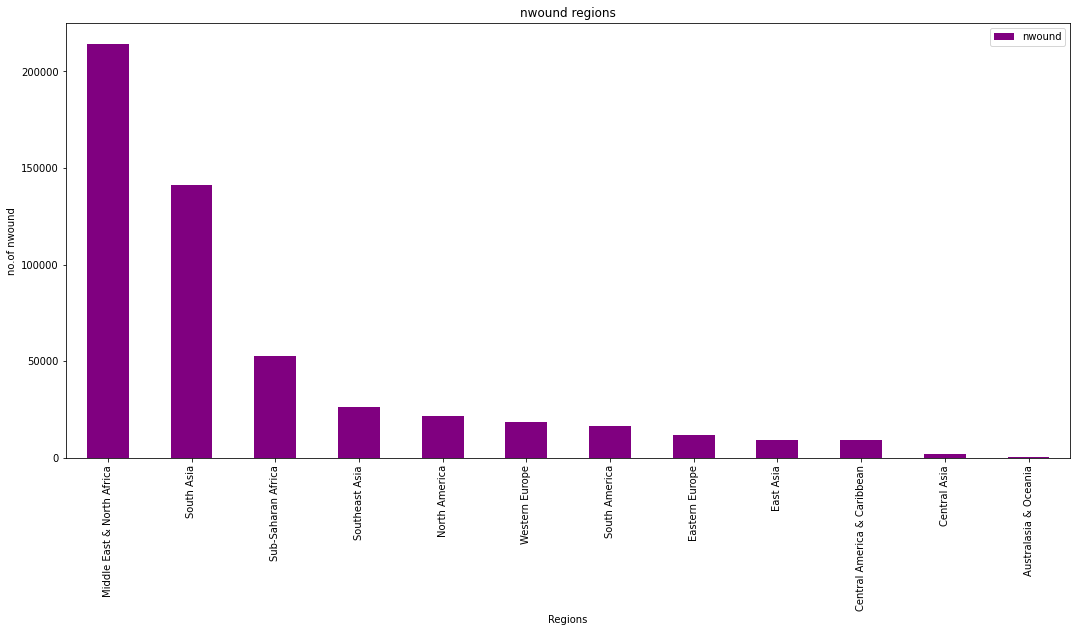

In [ ]:
region_wound.plot(kind="bar",figsize=(18,8),color=("purple"))
plt.title("nwound regions")
plt.xlabel("Regions")
plt.ylabel("no.of nwound")
plt.show()




#      3]country wise attacks.
          

##        a) number attacks in each country = Top 5

###              which country contain maximum number of  terririst  attacks ?

In [ ]:
city = df[["country_txt"]].value_counts().head (5)
city

country_txt
Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
dtype: int64

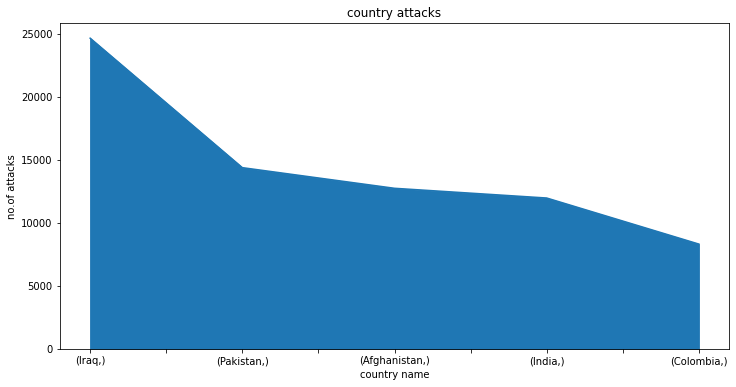

In [ ]:
city.plot(kind="area",figsize=(12,6))
plt.title("country attacks")
plt.xlabel("country name")
plt.ylabel("no.of attacks")
plt.show()

 


#           b)Total Casualties(nkill + nwound)in each countries.

###                which country contain maximum number of casualty in terririst attacks ?

In [ ]:
country_casualty = df[["country_txt","casualty"]].groupby("country_txt").sum().sort_values(by="casualty",ascending=False)
country_casualty.head(5)

,casualty
country_txt,
Iraq,213279.0
Afghanistan,83661.0
Pakistan,65860.0
India,48321.0
Nigeria,32921.0


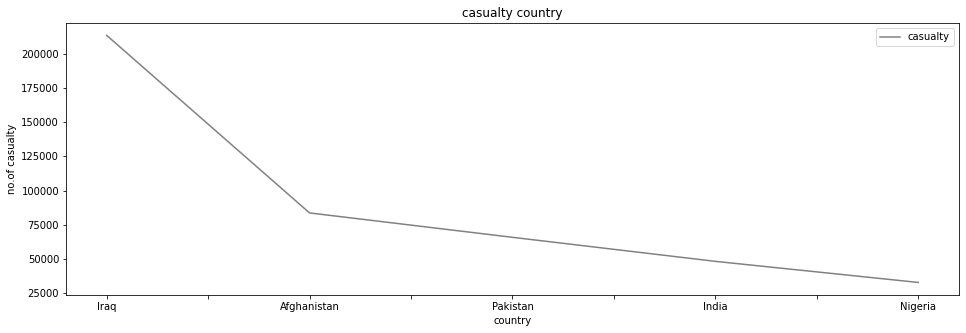

In [ ]:
country_casualty[:5].plot(kind="line",figsize=(16,5),color=("gray"))
plt.title("casualty country")
plt.xlabel("country")
plt.ylabel("no.of casualty")
plt.show()





##      c)Total nkill people in each country.

###            which country contain maximum number of kill people in terririst attacks ?

In [ ]:
country_kill = df[["country_txt","nkill"]].groupby("country_txt").sum().sort_values(by="nkill",ascending=False)
country_kill.head(5)

,nkill
country_txt,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0


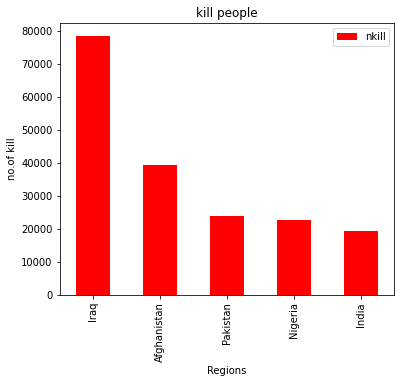

In [ ]:

country_kill[:5].plot(kind="bar",figsize=(6,5),color=("r"))
plt.title("kill people")
plt.xlabel("Regions")
plt.ylabel("no.of kill")
plt.show()



## d)Total nwound people in each country.
     
###      which country contain maximum number of wound people in terririst attacks ?

In [ ]:
country_wound = df[["country_txt","nwound"]].groupby("country_txt").sum().sort_values(by="nwound",ascending=False)
country_wound.head(5)

,nwound
country_txt,
Iraq,134690.0
Afghanistan,44277.0
Pakistan,42038.0
India,28980.0
United States,20702.0


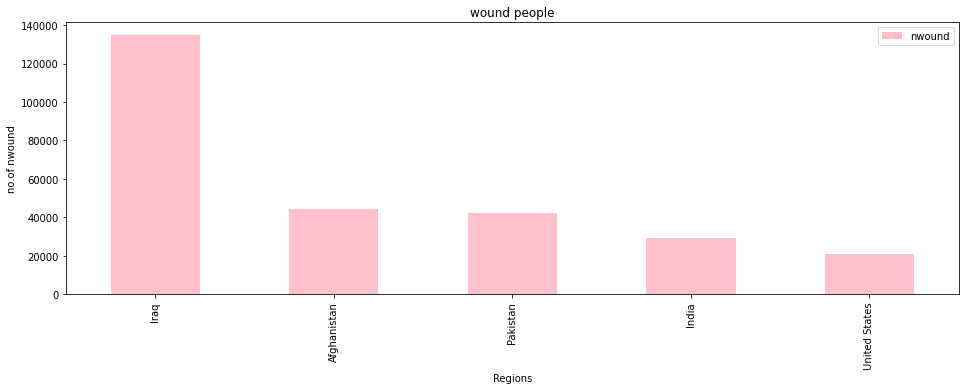

In [ ]:
country_wound[:5].plot(kind="bar",figsize=(16,5),color=("pink"))
plt.title("wound people")
plt.xlabel("Regions")
plt.ylabel("no.of nwound")
plt.show()


#        4] City wise attacks.
    

##            a) number of attacks in each city top (5)
                  
###                  which city contain maximum number of terririst attacks ?

In [ ]:
city_attacks = df["city"].value_counts()[1:6]
city_attacks

Baghdad    7589
Karachi    2652
Lima       2359
Mosul      2265
Belfast    2171
Name: city, dtype: int64

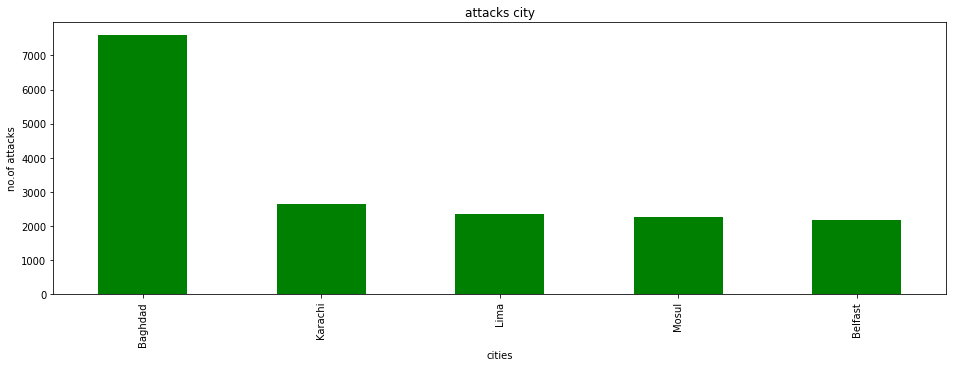

In [ ]:
city_attacks.plot(kind="bar",figsize=(16,5),color=("green"))
plt.title("attacks city")
plt.xlabel("cities")
plt.ylabel("no.of attacks")
plt.show()



            
##            b)Total Casualties(nkill + nwound)in each cities.
                 
###                 which city contain maximum number of casualty people in terririst attacks ?

In [ ]:
city_casualty = df[["city","casualty"]].groupby("city").sum().sort_values(by="casualty",ascending=False)
city_casualty.head(5)

,casualty
city,
Baghdad,77876.0
Unknown,35450.0
New York City,19619.0
Mosul,12927.0
Karachi,9376.0


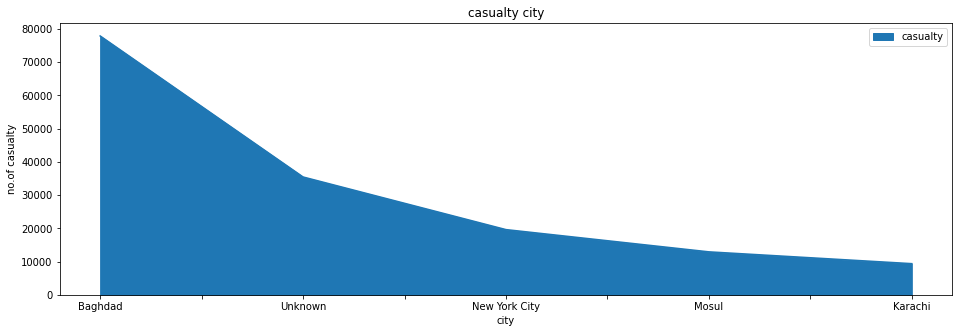

In [ ]:
city_casualty[:5].plot(kind="area",figsize=(16,5))
plt.title("casualty city")
plt.xlabel("city")
plt.ylabel("no.of casualty")
plt.show()



## c)Total nkill in each cities.

###      which city contain maximum number of kill  people in terririst attacks ?

In [ ]:
city_kill = df[["city","nkill"]].groupby("city").sum().sort_values(by="nkill",ascending=False)
city_kill.head(5)

,nkill
city,
Unknown,22647.0
Baghdad,21151.0
Mosul,7140.0
Mogadishu,3913.0
Karachi,3688.0


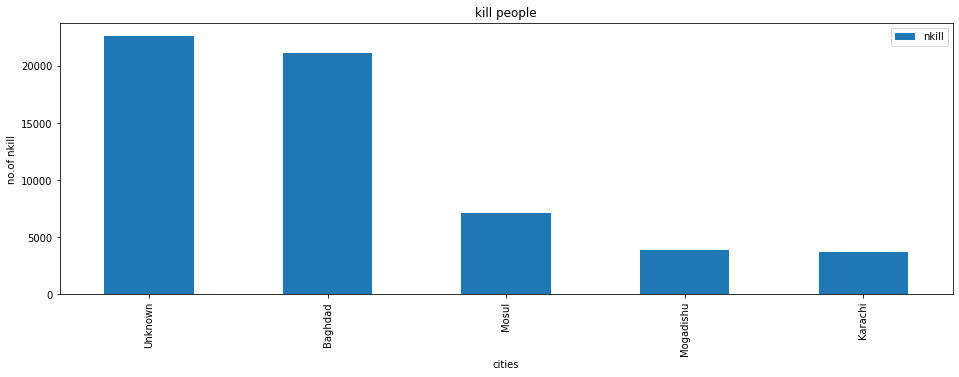

In [ ]:
city_kill[:5].plot(kind="bar",figsize=(16,5))
plt.title("kill people")
plt.xlabel("cities")
plt.ylabel("no.of nkill")
plt.show()



## d)Total nwound in each cities.
     
###     which city contain maximum number of wound people in terririst attacks ?

In [ ]:
city_wound = df[["city","nwound"]].groupby("city").sum().sort_values(by="nwound",ascending=False)
city_wound.head(5)

,nwound
city,
Baghdad,56725.0
New York City,16781.0
Unknown,12803.0
Kabul,5973.0
Mosul,5787.0


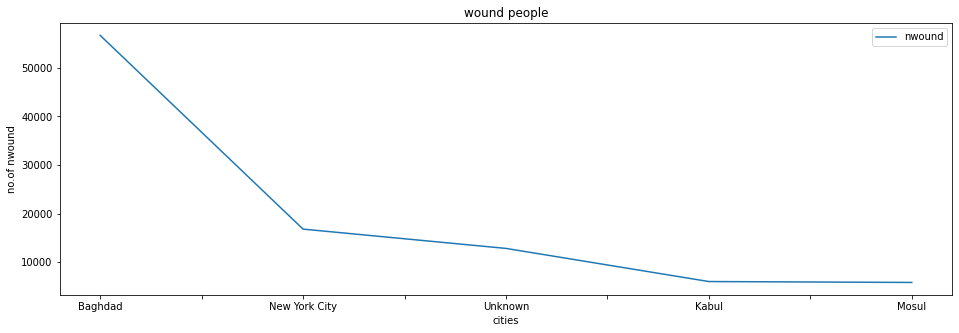

In [ ]:
city_wound[:5].plot(kind="line",figsize=(16,5))
plt.title("wound people")
plt.xlabel("cities")
plt.ylabel("no.of nwound")
plt.show()


#      5] Terrorrist group wise attacks TOP(5)
        
##        a)number of attacks by each group.


###              which group contain maximum number of  terririst attacks ?

In [ ]:
group = df["gname"].value_counts()[1:6]
group

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
Name: gname, dtype: int64

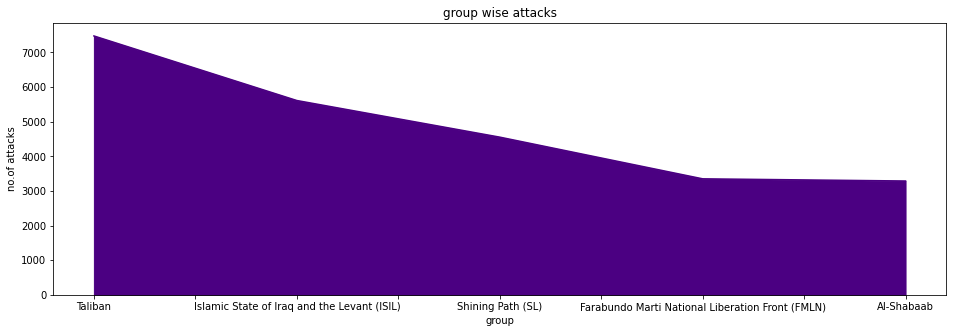

In [ ]:
group.plot(kind="area",figsize=(16,5),color="indigo")
plt.title("group wise attacks")
plt.xlabel("group")
plt.ylabel("no.of attacks")
plt.show()


# **b)Total Casualties(nkill + nwound)in each group**


   ### which group contain maximum number of casualty terririst attacks ?

In [ ]:
group_casualty = df[["gname","casualty"]].groupby("gname").sum().sort_values(by="casualty",ascending=False)
group_casualty.head(5)

,casualty
gname,
Unknown,322706.0
Islamic State of Iraq and the Levant (ISIL),69595.0
Taliban,57342.0
Boko Haram,29801.0
Al-Qaida,28372.0


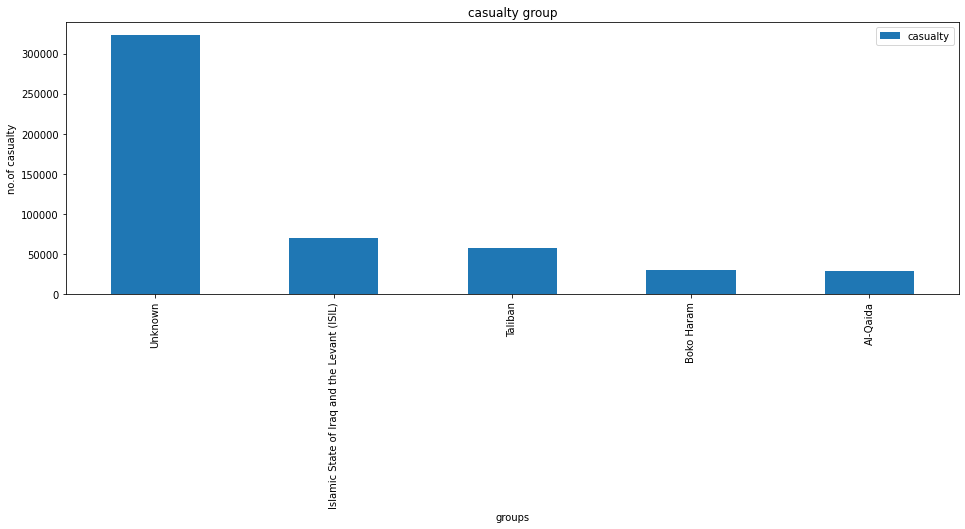

In [ ]:
group_casualty[:5].plot(kind="bar",figsize=(16,5))
plt.title("casualty group")
plt.xlabel("groups")
plt.ylabel("no.of casualty")
plt.show()


# **Total nkill in each group**

###  which group contain maximum number of kill people in terririst attacks ?

In [ ]:
group_kill = df[["gname","nkill"]].groupby("gname").sum().sort_values(by="nkill",ascending=False)
group_kill.head(5)

,nkill
gname,
Unknown,112367.0
Islamic State of Iraq and the Levant (ISIL),38923.0
Taliban,29410.0
Boko Haram,20328.0
Shining Path (SL),11601.0


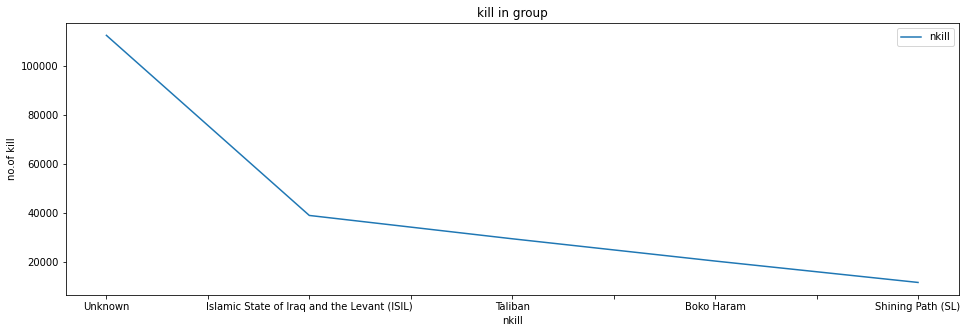

In [ ]:
group_kill[:5].plot(kind="line",figsize=(16,5))
plt.title("kill in group")
plt.xlabel("nkill")
plt.ylabel("no.of kill")
plt.show()

# **Total nwoundin each group**

###       which group contain maximum number of wound people terririst attacks ?

In [ ]:
group_wound = df[["gname","nwound"]].groupby("gname").sum().sort_values(by="nwound",ascending=False)
group_wound.head(5)

,nwound
gname,
Unknown,210339.0
Islamic State of Iraq and the Levant (ISIL),30672.0
Taliban,27932.0
Al-Qaida,24512.0
Liberation Tigers of Tamil Eelam (LTTE),11031.0


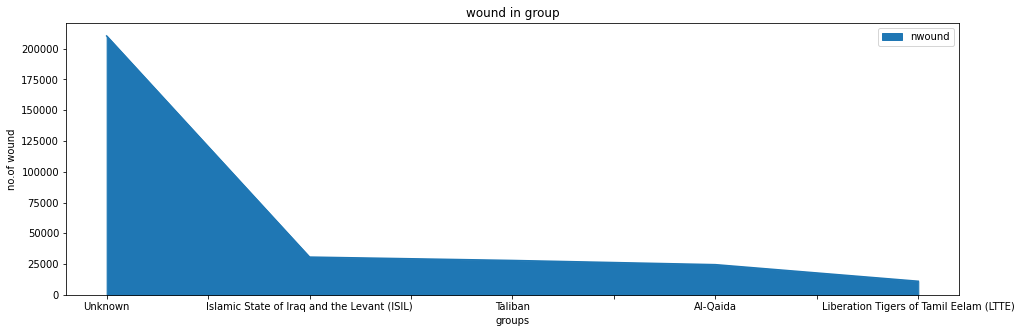

In [ ]:
group_wound[:5].plot(kind="area",figsize=(16,5))
plt.title("wound in group")
plt.xlabel("groups")
plt.ylabel("no.of wound")
plt.show()

 
    # Observations : 
      
      1)the data consist of terrorist activities : 1970-2017

      2)maximum number of total casualties in an event : 9574

      3)maximum number of people nwound in an event :8191

       4)maximum number of people nkill in an event : 1570

    1] year wise attacks :  
      a)no.of attacks in each year
        -Maximum number of attacks occurs in 2014.
        -Minimum number of attacks occurs in 1971.

      b)Total Casualties(nkill + nwound)in each year
         
       - maximum casuality occurs in 2014 year.

       - less casuality occurs in 1970 year.

       - 1970 to 2014 casuality has  increased.

      c)nkill in each year

       - In 2014 maximum number of people killed and 
       - In 1970 less number of people killed in the terrorism aatacks.

      d)nwound in each year

        - In 2015 maximum number of people wounded.

        - In 1971 minimum number of people wounded.

         
  2] Regions wise Attacks
    
      a)Distribution of terrorist attacks over regions from 1970-2017

        -  Middle East and North Africa affected with maximum attacks.

        -  East Asia affected less attacks.

      b)Total terririst attacks in each regions.

        - most affected regions by terririst attacks are middle EastNorth Africa.

        - less affected regions by terririst attacks is Central Asia.

      c)Total Casualties(nkill + nwound)in each regions

        - Maximum Casualty showing in region = Middle East and North Africa.

        - minimum casualty showing in region = Australasia and Oceania.

      d)Total nkill people in each regions.

         - Middle East and North Africa = maximum people are killed in this regions.

          - Australasia and Oceania = minimum people are killed in this region.

      e)Total nwound people in each regions.

        - Middle East and North Africa = maximum people are wounded in this regions.

        - Australasia and Oceania = minimum people are wounded in this region.

  3] country wise attacks.
      
        a) number attacks in each country = Top 5

           -  In the first five countries :

           -  maximum attacks country is iraq.

           -  minimum attacks county is colombia.

         b) Total Casualties(nkill + nwound)in each countries.

             In the first five countries :showing following result by top five countries:

             - maximum casualty showed in iraq country.

             -  minimum casualty showed in nigeria country.

          c) Total nkill people in each country.
         
              showing following result by top five countries:

              -  maximum killed people in Iraq country.

               -  minimum killed people in India country.

          d)Total nwound people in each country.
           
              showing following result by top five countries:

              - maximum wounded people in Iraq country.

              - minimum wounded people in United States country.

     4] City wise attacks.
          a) number of attacks in each city top (5)

              showing of five countries result :
              - baghdad is most affected city for terririst attacks.

          b)Total Casualties(nkill + nwound)in each cities.

               showing of five countries result :
             - maximum casualty showed in baghdad.

          c)Total nkill in each cities.
               showing of five countries result :
             - maximum killed people in unknown region.

          d)Total nwound in each cities.

                 showing of five countries result :
              - maximum wounded people in Baghdad region.

    5] Terrorrist group wise attacks TOP(5)
         
                - maximum attacks showed unknown place.